In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from GeneticFeatures.GeneticFeatureGenerator import *
from GeneticFeatures.Node import *

from tester import *

In [2]:
def add(x, y):
    return x + y

def sub(x, y):
    return x - y

def mul(x, y):
    return x * y

def div(x, y):
    return x / (y + 1e-10)

def hyp(x, y):
    if isinstance(x, float) and isinstance(y, float):
        return np.hypot(x, y)
    if isinstance(x, float):
        x = np.ones_like(y) * x
    if isinstance(y, float):
        y = np.ones_like(x) * y
    return np.hypot(x, y)

def log(x, y):
    if isinstance(x, float) and isinstance(y, float):
        return np.log(np.hypot(x, y) + 1e-10)
    if isinstance(x, float):
        x = np.ones_like(y) * x
    if isinstance(y, float):
        y = np.ones_like(x) * y
    return np.log(np.hypot(x, y) + 1e-10)

In [3]:
generator = GeneticFeatureGenerator(
    [add, sub, mul, div, hyp, log],
    operation_names = ["+", "-", "*", "/", "hyp", "log"],
    popsize = 120, 
    maxiter = 200, 
    mutation_rate = 0.05,
    max_tree_depth = 8,
)

In [4]:
dataset = pd.read_csv("csv/Concrete_Data_Yeh.csv")
dataset.dropna(inplace=True)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [5]:
tester = tester(X, y, generator, 8, 1, 400, verbose = True, test_size = 0.3, random_state = 17)

Split:  0 Feature:  0
Iteration:  199 Best fitness:  0.595353720960756 Generation best 0.5799223745148407
Split:  0 Feature:  1
Iteration:  199 Best fitness:  0.5950162188513678 Generation best 0.5820411377571116
Split:  0 Feature:  2
Iteration:  199 Best fitness:  0.5841599009993812 Generation best 0.5545534659591622
Split:  0 Feature:  3
Iteration:  199 Best fitness:  0.6045975287345546 Generation best 0.5853974087338045
Split:  0 Feature:  4
Iteration:  199 Best fitness:  0.5668910430690192 Generation best 0.54302214388839934
Split:  0 Feature:  5
Iteration:  199 Best fitness:  0.593178707366921 Generation best 0.57054731592072454
Split:  0 Feature:  6
Iteration:  199 Best fitness:  0.5897661860386627 Generation best 0.5858661616635104
Split:  0 Feature:  7
Iteration:  199 Best fitness:  0.5922224513903211 Generation best 0.5726473290458065


In [6]:
for tree in tester.trees:
    tree.root.update_depth(1)
    print(tree.root.get_max_depth())

8
8
8
8
8
8
8
8


In [7]:
tester.test_models(notests=20)

Iteration 4 - MSE 25.990670642188398, R2 0.902841664405811, MAE 3.7975810267423316, NEW_MSE 27.0412237382856, NEW_R2 0.8989144863935421, NEW_MAE 3.671733794019123
Iteration 9 - MSE 25.827425061301454, R2 0.9034519091028578, MAE 3.789826993404012, NEW_MSE 26.66019570940293, NEW_R2 0.9003388455265028, NEW_MAE 3.6118234120446657
Iteration 14 - MSE 25.259870628112523, R2 0.9055735413164656, MAE 3.7294308037029236, NEW_MSE 26.47368012229908, NEW_R2 0.9010360781702795, NEW_MAE 3.6493907214760024
Iteration 19 - MSE 24.990700170931035, R2 0.9065797544292751, MAE 3.7574121676979066, NEW_MSE 26.999737966653083, NEW_R2 0.8990695685219776, NEW_MAE 3.6531092787752546
Iteration 4 - MSE 99.7067335605233, R2 0.6272762479414793, MAE 7.804057549420228, NEW_MSE 61.218639313627214, NEW_R2 0.7711524575515074, NEW_MAE 5.998386403273754
Iteration 9 - MSE 100.1378950683116, R2 0.625664479817228, MAE 7.794110794228292, NEW_MSE 62.352926465910244, NEW_R2 0.7669122648562561, NEW_MAE 6.032018228989448
Iteration 1

In [8]:
tester.get_tests()

,Model,MSE,R2,MAE,NEW_MSE,NEW_R2,NEW_MAE
0,RandomForestRegressor,25.644774,0.904135,3.771773,26.265553,0.901814,3.594447
1,SGDRegressor,100.025969,0.626083,7.816812,61.787553,0.769026,6.011835
2,GradientBoostingRegressor,39.676272,0.851682,3.923969,36.202064,0.864669,3.913538


In [9]:
print(tester.get_tests().T.to_latex(index=False))  

\begin{tabular}{lll}
\toprule
                    0 &            1 &                         2 \\
\midrule
RandomForestRegressor & SGDRegressor & GradientBoostingRegressor \\
            25.644774 &   100.025969 &                 39.676272 \\
             0.904135 &     0.626083 &                  0.851682 \\
             3.771773 &     7.816812 &                  3.923969 \\
            26.265553 &    61.787553 &                 36.202064 \\
             0.901814 &     0.769026 &                  0.864669 \\
             3.594447 &     6.011835 &                  3.913538 \\
\bottomrule
\end{tabular}



C:\Users\David Arcos\AppData\Local\Temp\ipykernel_12192\2462179699.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(tester.get_tests().T.to_latex(index=False))


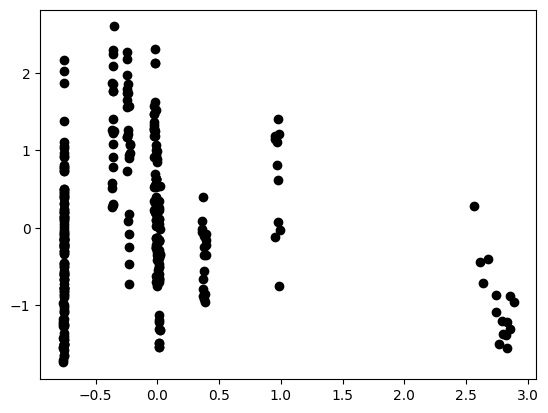

Min:  -0.7665045505234146 Max:  2.8861381993995883 Mean:  -0.1411975547153384 Std:  0.7901547610816925


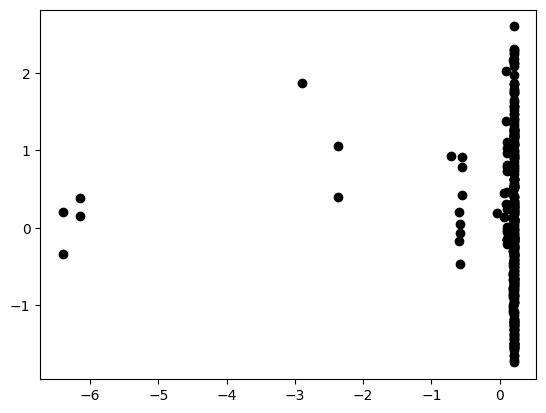

Min:  -6.40103721345261 Max:  0.20538437515617247 Mean:  0.06360018789365095 Std:  0.7857777442255961


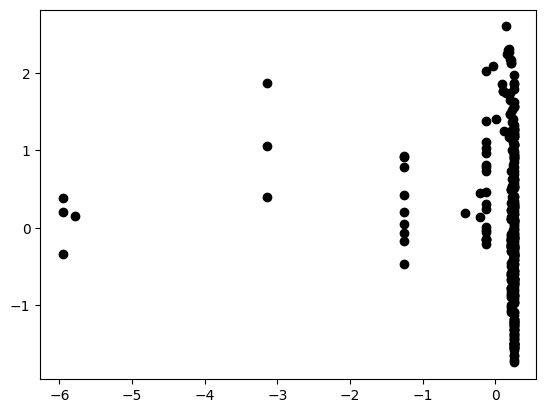

Min:  -5.954636395834727 Max:  0.25105632367386904 Mean:  0.053317420528872415 Std:  0.8020778267568894


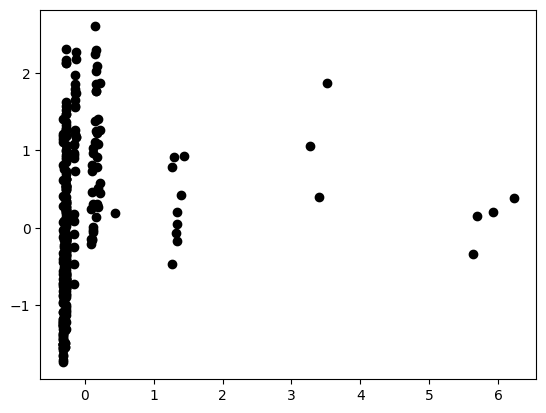

Min:  -0.31725568599417 Max:  6.2234256944779665 Mean:  -0.05341857793371322 Std:  0.8208586968590602


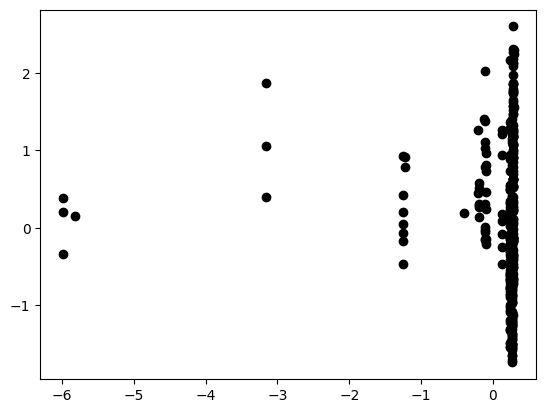

Min:  -5.9888256883781015 Max:  0.28917375002670387 Mean:  0.06340528936719135 Std:  0.8092187691563554


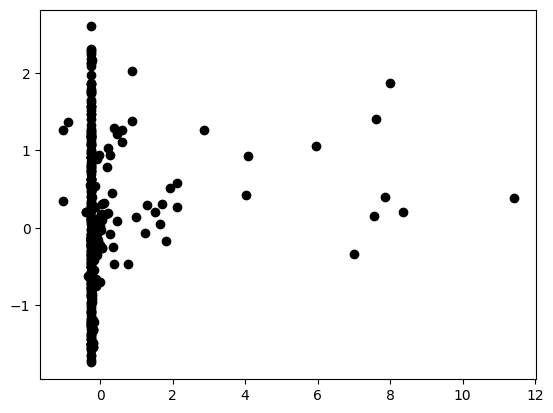

Min:  -1.0291117818857043 Max:  11.408233570582496 Mean:  0.1093827545132641 Std:  1.4090739810487363


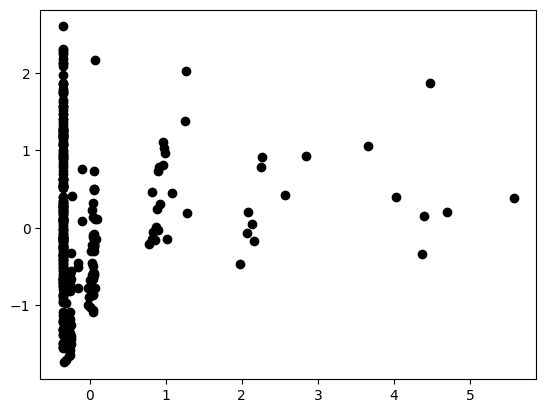

Min:  -0.3543961734888284 Max:  5.575186227688388 Mean:  -0.01766459310079776 Std:  0.869876791456867


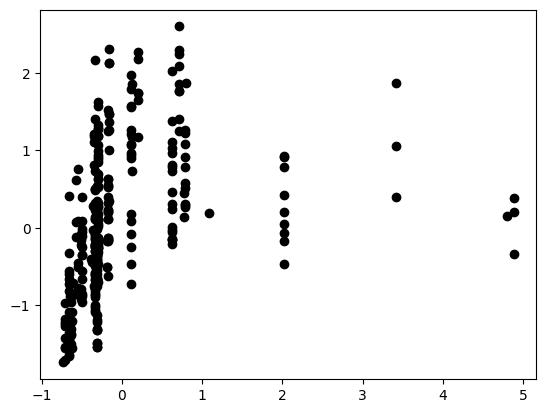

Min:  -0.735436962807099 Max:  4.881318436917127 Mean:  -0.02295795487156448 Std:  0.8576851954889401


In [10]:
for i in range(tester.X_test.shape[1],tester.new_X_test.shape[1]):
    plt.clf()
    plt.scatter(tester.new_X_test[:,i], tester.y_test, color = 'black')
    plt.show()
    print("Min: ", tester.new_X_test[:, i].min(), "Max: ", tester.new_X_test[:, i].max(), "Mean: ", tester.new_X_test[:, i].mean(), "Std: ", tester.new_X_test[:, i].std())